# Q1, Q2, Q3


      id                         listing_url       scrape_id last_scraped  \
0   6369   https://www.airbnb.com/rooms/6369  20210413152844   2021-04-15   
1  21853  https://www.airbnb.com/rooms/21853  20210413152844   2021-04-16   
2  23001  https://www.airbnb.com/rooms/23001  20210413152844   2021-04-16   
3  24805  https://www.airbnb.com/rooms/24805  20210413152844   2021-04-15   
4  26825  https://www.airbnb.com/rooms/26825  20210413152844   2021-04-15   

                                       name  \
0  Rooftop terrace room ,  ensuite bathroom   
1                      Bright and airy room   
2         Apartmento Arganzuela- Madrid Rio   
3                    Gran Via Studio Madrid   
4        Single Room whith private Bathroom   

                                         description  \
0  Excellent connection with the AIRPORT and EXHI...   
1  We have a quiet and sunny room with a good vie...   
2  Apartamento de tres dormitorios dobles, gran s...   
3  Studio located 50 meters fr

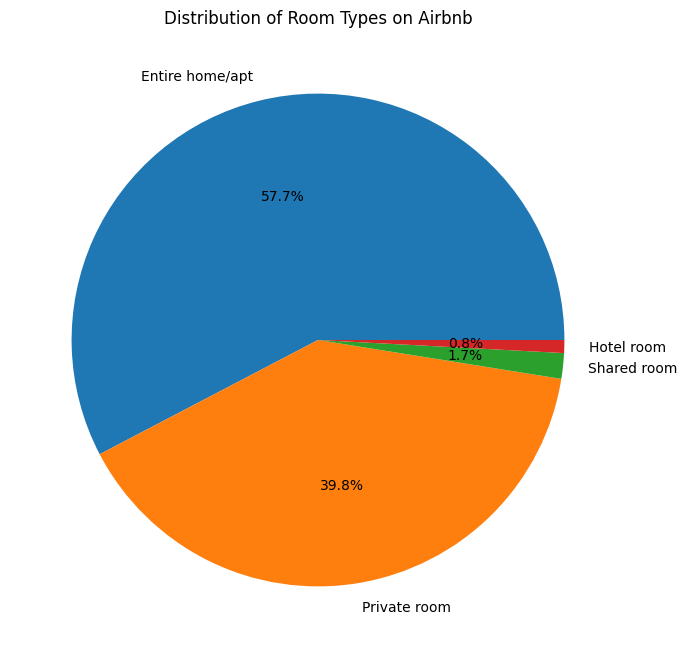

Top Neighborhoods by Number of Listings:
neighbourhood_cleansed
Embajadores    2318
Universidad    1869
Palacio        1506
Sol            1125
Justicia        951
Name: count, dtype: int64


<ipython-input-2-e69f9c935694>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=neighborhood_dist.index[:10], x=neighborhood_dist.values[:10], palette='viridis')


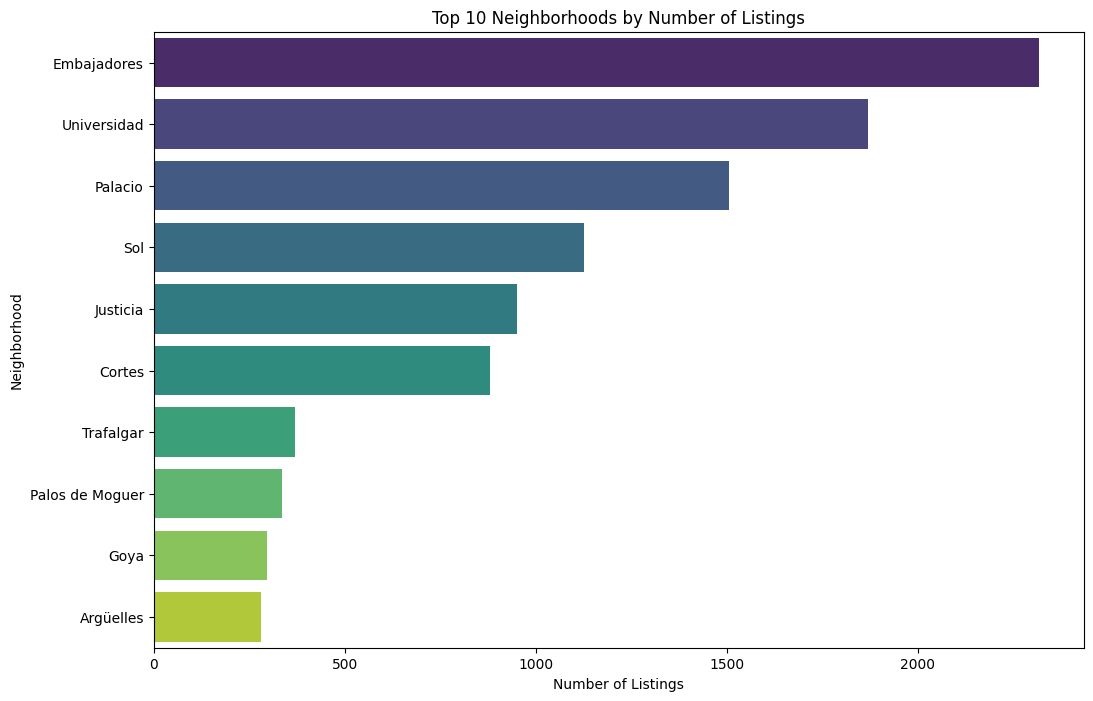

Summary Statistics for Host Listings Count:
count    19091.000000
mean        12.114557
std        101.803820
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       7755.000000
Name: host_total_listings_count, dtype: float64


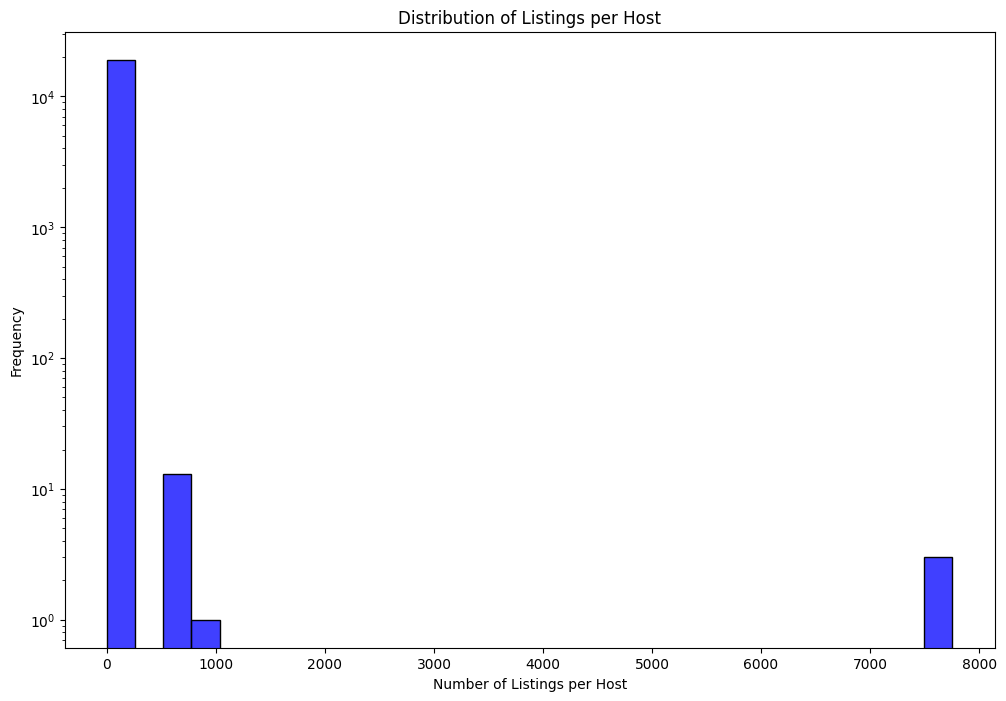

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/listings_detailed.csv')

# Display the first few rows to understand the structure of the data
print(data.head())
print(data.info())
# Analyze room types distribution
room_type_dist = data['room_type'].value_counts()
print("\
Room Type Distribution:")
print(room_type_dist)

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(room_type_dist.values, labels=room_type_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Room Types on Airbnb')
plt.show()
# Q2.
# Analyze the distribution of listings across neighborhoods
neighborhood_dist = data['neighbourhood_cleansed'].value_counts()

# Display the top neighborhoods with the most listings
print("\
Top Neighborhoods by Number of Listings:")
print(neighborhood_dist.head())

# Plot the distribution of listings across neighborhoods
plt.figure(figsize=(12, 8))
sns.barplot(y=neighborhood_dist.index[:10], x=neighborhood_dist.values[:10], palette='viridis')
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()
# Q3.
# Analyze the number of listings per host
host_listings_dist = data['host_total_listings_count'].value_counts().sort_index()

# Display summary statistics for host listings
print("\
Summary Statistics for Host Listings Count:")
print(data['host_total_listings_count'].describe())

# Plot the distribution of host listings count
plt.figure(figsize=(12, 8))
sns.histplot(data['host_total_listings_count'], bins=30, kde=False, color='blue')
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale to better visualize the distribution
plt.show()

#Q4

In [4]:
!pip install spacy_langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 998.1/998.1 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993410 sha256=1ded5cf7f6d178ab30315cfbd6186b4919893753d8cc88d9573498f22d9cd7cb
  Stored in directory: /root/.cache/pip/wheels/c7/22/8b/c053f2c06a804491c614f194322b8fa897fd092e47e75c51de
Successfully built langdetect


In [ ]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add LanguageDetector as a custom pipeline
def get_lang_detector(nlp, name):
    return LanguageDetector()

Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe("language_detector", last=True)

# Function to detect language
def detect_language(text):
    try:
        doc = nlp(str(text))
        return doc._.language["language"]
    except:
        return None

# Load dataset
df = pd.read_csv('/content/listings_detailed.csv')

# Apply language detection
df["language"] = df["description"].astype(str).apply(detect_language)

# Count detected languages
print(df["language"].value_counts())

# Save results
df.to_csv("listings_with_language.csv", index=False)

# Q5

In [5]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = "/content/listings_detailed.csv"  # Update if needed
df = pd.read_csv(file_path)

# Preview the dataset
print(df.head())

# Select relevant columns (Ensure correct column names)
columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'price']

# Check if 'host_identity_verified' exists (categorical feature)
if 'host_identity_verified' in df.columns:
    df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})  # Convert to numeric
    columns.insert(1, 'host_identity_verified')

# Filter dataset - Keep only rows with no missing values in 'columns'
df = df[columns].dropna()

# Convert price column to numeric (handle currency symbols if any)
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check if the DataFrame is empty after filtering
if df.empty:
    print("DataFrame is empty after filtering. Check for missing values or data issues.")
else:
    # Define independent (X) and dependent (y) variables
    X = df.drop(columns=['price'])
    y = df['price']

    # Add constant for intercept
    X = sm.add_constant(X)

    # Build and fit the model
    model = sm.OLS(y, X).fit()

    # Print model summary
    print(model.summary())

      id                         listing_url       scrape_id last_scraped  \
0   6369   https://www.airbnb.com/rooms/6369  20210413152844   2021-04-15   
1  21853  https://www.airbnb.com/rooms/21853  20210413152844   2021-04-16   
2  23001  https://www.airbnb.com/rooms/23001  20210413152844   2021-04-16   
3  24805  https://www.airbnb.com/rooms/24805  20210413152844   2021-04-15   
4  26825  https://www.airbnb.com/rooms/26825  20210413152844   2021-04-15   

                                       name  \
0  Rooftop terrace room ,  ensuite bathroom   
1                      Bright and airy room   
2         Apartmento Arganzuela- Madrid Rio   
3                    Gran Via Studio Madrid   
4        Single Room whith private Bathroom   

                                         description  \
0  Excellent connection with the AIRPORT and EXHI...   
1  We have a quiet and sunny room with a good vie...   
2  Apartamento de tres dormitorios dobles, gran s...   
3  Studio located 50 meters fr